## 0827 과제
 - 데이터셋 : scikit-learn의 load_diabetes의 활용
 - 학습방법 : 지도학습 > 회귀
 - 알고리즘 : KNNRegrossor

In [264]:
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

In [265]:
# 기본 : DataFrame 형태로 반환
dataDict = load_diabetes(as_frame = True)
dataDict.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [266]:
dataDict['target']  # 1년 뒤 당뇨병 진행도를 나타내는 수치값이라고 함. 그럼? 피처 10개 중에서 가장 상관관계가 높은 것을 파악 해보자.
# type(a)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [267]:
dataDF = dataDict['data']
dataDF

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [268]:
temp = pd.DataFrame([dataDict['target'],dataDF['age']]).T
temp.corr()['age']['target']

0.1878887507189197

In [269]:
cor_dict = {}
for c in dataDF.columns.to_list():  # 상관관계 순위 분석 목적
    tempDF = pd.DataFrame([dataDict['target'],dataDF[c]]).T
    print(tempDF.corr())
    print(f'{c}-target 상관관계 : ', end=" ")
    print(tempDF.corr()[c]['target'])
    cor_dict[c] = tempDF.corr()[c]['target']
# best_k = sorted(scores.items(), key=lambda x:x[1], reverse=True)[0][0]

          target       age
target  1.000000  0.187889
age     0.187889  1.000000
age-target 상관관계 :  0.1878887507189197
          target       sex
target  1.000000  0.043062
sex     0.043062  1.000000
sex-target 상관관계 :  0.043061998451605396
         target      bmi
target  1.00000  0.58645
bmi     0.58645  1.00000
bmi-target 상관관계 :  0.5864501344746884
          target        bp
target  1.000000  0.441482
bp      0.441482  1.000000
bp-target 상관관계 :  0.44148175856257094
          target        s1
target  1.000000  0.212022
s1      0.212022  1.000000
s1-target 상관관계 :  0.21202248101455068
          target        s2
target  1.000000  0.174054
s2      0.174054  1.000000
s2-target 상관관계 :  0.1740535869687425
          target        s3
target  1.000000 -0.394789
s3     -0.394789  1.000000
s3-target 상관관계 :  -0.3947892506709183
          target        s4
target  1.000000  0.430453
s4      0.430453  1.000000
s4-target 상관관계 :  0.4304528847447729
          target        s5
target  1.000000  0.565883


In [270]:
cor_dict

{'age': 0.1878887507189197,
 'sex': 0.043061998451605396,
 'bmi': 0.5864501344746884,
 'bp': 0.44148175856257094,
 's1': 0.21202248101455068,
 's2': 0.1740535869687425,
 's3': -0.3947892506709183,
 's4': 0.4304528847447729,
 's5': 0.5658825924427434,
 's6': 0.3824834842485807}

In [271]:
cor_dict = dict(sorted(cor_dict.items(), key=lambda x:x[1],reverse=True))   # sorted 함수는 리스트로 정렬 값 반환
# cor_dict = sorted(cor_dict, key=lambda x:x[1],reverse=True) # 첨에 해당 코드 사용 But? 리스트로 반환 및 키값만 남아있는 리스트가 되어버린다.
# or_dict
# cor_dict.items()
cor_dict

{'bmi': 0.5864501344746884,
 's5': 0.5658825924427434,
 'bp': 0.44148175856257094,
 's4': 0.4304528847447729,
 's6': 0.3824834842485807,
 's1': 0.21202248101455068,
 'age': 0.1878887507189197,
 's2': 0.1740535869687425,
 'sex': 0.043061998451605396,
 's3': -0.3947892506709183}

In [272]:
dataDF[['bmi', 's5']]

,bmi,s5
0,0.061696,0.019907
1,-0.051474,-0.068332
2,0.044451,0.002861
3,-0.011595,0.022688
4,-0.036385,-0.031988
...,...,...
437,0.019662,0.031193
438,-0.015906,-0.018114
439,-0.015906,-0.046883
440,0.039062,0.044529


 [2] 피처 : bmi, s5,bp,s4 총 4개만 하자 // 0.4 이상.

In [273]:
dataDF[['bmi', 's5','bp','s4']]

,bmi,s5,bp,s4
0,0.061696,0.019907,0.021872,-0.002592
1,-0.051474,-0.068332,-0.026328,-0.039493
2,0.044451,0.002861,-0.005670,-0.002592
3,-0.011595,0.022688,-0.036656,0.034309
4,-0.036385,-0.031988,0.021872,-0.002592
...,...,...,...,...
437,0.019662,0.031193,0.059744,-0.002592
438,-0.015906,-0.018114,-0.067642,0.034309
439,-0.015906,-0.046883,0.017293,-0.011080
440,0.039062,0.044529,0.001215,0.026560


In [274]:
feature = dataDF[['bmi', 's5','bp','s4']]
target = dataDict['target']

# 피쳐가 2D 이어야하는 이유는 거리를 계산해야하기 때문이다.

In [275]:
print(f"피쳐 셰잎 : {feature.shape}, 피쳐 차원 : {feature.ndim}")
print(f"타겟 셰잎 : {target.shape}, 타겟 차원 : {target.ndim}")

피쳐 셰잎 : (442, 4), 피쳐 차원 : 2
타겟 셰잎 : (442,), 타겟 차원 : 1


In [276]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [277]:
from sklearn.model_selection import train_test_split
# 샘플 중에서 몇대 몇 비율로, 학습 / 테스트용 샘플로 나눌지 결정해야ㅣㅈ.

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.2,
                                                    # stratify=target,  # 오류 뜸....
                                                    random_state=10)

In [278]:
print(f'X_train : {X_train.shape}, {X_train.ndim}D, X_test {X_test.shape}, {X_test.ndim}D')
print(f'y_train : {y_train.shape}, {y_train.ndim}D, y_test {y_test.shape}, {y_test.ndim}D')

X_train : (353, 4), 2D, X_test (89, 4), 2D
y_train : (353,), 1D, y_test (89,), 1D


[4?] 학습 진행, 스케일링, 최적 k 진행 X

In [279]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
model.fit(X_train, y_train)

KNeighborsRegressor()

In [280]:
model.score(X_test, y_test) 
# ㅋ

0.33462676792482704

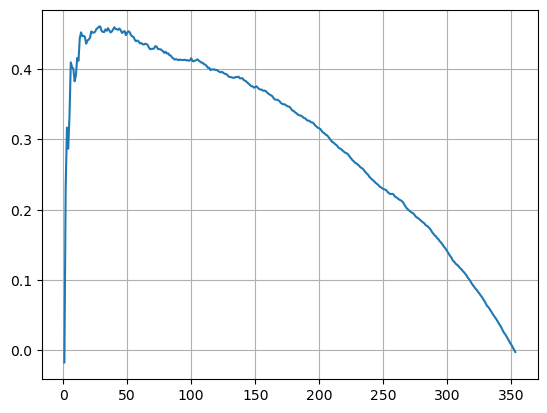

In [281]:
scores ={}
for k in range(1, model.n_samples_fit_+1 ):
    model.n_neighbors=k

    score = model.score(X_test, y_test)
    
    scores[k]=score

plt.plot(list(scores.keys()), list(scores.values()))
plt.grid()
plt.show()

## 스케잉ㄹ링....

In [282]:
from sklearn.preprocessing import MinMaxScaler

mmScaler = MinMaxScaler()

In [283]:
mmScaler.fit(X_train)

MinMaxScaler()

In [284]:
X_train_Scaled = mmScaler.transform(X_train)
X_test_Scaled = mmScaler.transform(X_test)

In [285]:
model = KNeighborsRegressor()
model.fit(X_train_Scaled, y_train)
model.score(X_test_Scaled, y_test) 

0.35571729440048094

## 최적 K
와 노트북 너무 뜨거워요 살렺

In [286]:
model.predict(X_train_Scaled)

distance, index = model.kneighbors(X_train_Scaled, n_neighbors=5)

# model.kneighbors(X_train_Scaled, n_neighbors=5)   
index   # 아 피쳐가 5개 였ㄱ나 각각 거리 총 합산으로 해서 ... 보는건가 ? 

array([[  0,  69, 348,  18, 164],
       [  1,   3, 226, 205, 179],
       [  2,  23, 193, 335,  19],
       ...,
       [350, 195,  87, 277, 145],
       [351, 334, 261, 254, 113],
       [352, 132, 345, 193, 221]], dtype=int64)

In [287]:
neighbors = index.reshape(-1).tolist()

In [288]:
model.n_neighbors   

5

In [289]:
model.n_samples_fit_

353

In [290]:
# 그럼 모든 점수 돌려봐서 아니 , range로 싹 다 돌려보고? 그중 평판, score가 가장 높은게 베스트 k ok 고

# rmfja djzp gkejfk dmfkasdmkff?Fdsffffdsffttqtqqtafdpdpdpdpd whffudy
scores_k = {}
for k in range(1, model.n_samples_fit_+1):
    model.n_neighbors=k
    score = model.score(X_test_Scaled, y_test)
    scores_k[k]=score

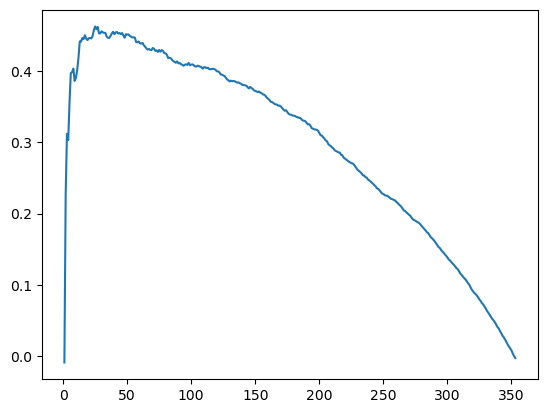

In [291]:
# 이 중에서 젤 높은거
plt.plot(list(scores_k.keys()), list(scores_k.values()))
plt.show()

In [292]:
spbest_k = sorted(scores_k.items(), key=lambda x: x[1], reverse=True)[0][0]
spbest_k

25

In [293]:
model.n_neighbors=spbest_k
model.score(X_test_Scaled, y_test)
# 와 여전히 티끌

0.4619302371450822

In [294]:
# X_test_Scaled[neighbors]

# 아니 저래 뭐가 많이 뜨는데 맞다고 ???? 근접 몇개만 찾는거 아니었나 

# X_train_Scaled[neighbors][:,0]

### 2트 dataDF[['bmi', 's5']]로 다시

In [295]:
re_feature = dataDF[['bmi', 's5']]
re_target = dataDict['target']

In [296]:
# 보자. 스케일링 하고 ? 최적k찾고 다시 구하기. 
re_X_train, re_X_test, re_y_train, re_y_test = train_test_split(re_feature, re_target, test_size=0.2, random_state=10)  # 다시 갈라서


In [297]:
# # 스케일링 
# mmScaler.fit(re_X_train)

# re_X_train_scaled=mmScaler.transform(re_X_train)
# re_X_test_scaled=mmScaler.transform(re_X_test)

In [303]:
remodel = KNeighborsRegressor()
remodel.fit(re_X_train, re_y_train)

KNeighborsRegressor()

In [302]:
# remodel.score(re_X_test_scaled, re_y_test)

In [304]:
re_scores_k = {}
for k in range(1, model.n_samples_fit_+1):
    remodel.n_neighbors=k
    score = remodel.score(re_X_test, re_y_test)
    re_scores_k[k]=score
# 아나ㅣ 그놈의 이름이 뭔데???????????  ...이래 스케일과 k는 같이 하면 안되는건가 보다 
# ㅎ

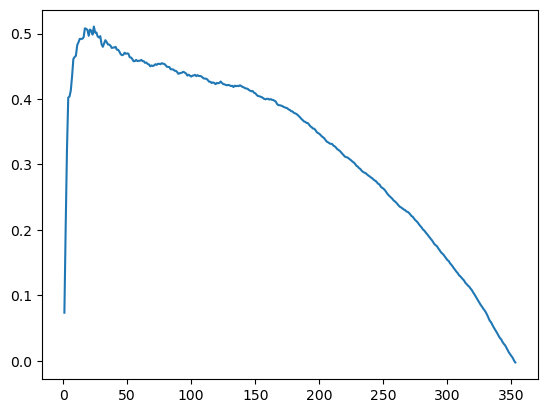

In [305]:
plt.plot(list(re_scores_k.keys()), list(re_scores_k.values()))
plt.show()  

In [308]:
re_k = sorted(re_scores_k.items(), key=lambda x: x[1], reverse=True)[0][0]

re_k


24

In [ ]:
remodel.n_neighbors= re_k
remodel.score(re_X_test, re_y_test) # 와 너무 기쁘다 ...